<a href="https://colab.research.google.com/github/lenare/mlses-wind-power-forecast/blob/main/prototyping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration UK
For having a first look at data and experimenting with solutions.

In [2]:
# Import dependencies
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_info_columns", 500)


UK data

In [3]:
uk_dir = "../data/uk/raw/"
uk_processed_dir = "../data/processed/uk/"
uk_2016_dir = f"{uk_dir}Kelmarsh_SCADA_2016_3082/"
uk_2017_dir = f"{uk_dir}Kelmarsh_SCADA_2017_3083/"
uk_2018_dir = f"{uk_dir}Kelmarsh_SCADA_2018_3084/"
uk_2019_dir = f"{uk_dir}Kelmarsh_SCADA_2019_3085/"
uk_2020_dir = f"{uk_dir}Kelmarsh_SCADA_2020_3086/"
uk_2021_dir = f"{uk_dir}Kelmarsh_SCADA_2021_3087/"


In [4]:
kelmarsh_1_2016 = f"{uk_2016_dir}Turbine_Data_Kelmarsh_1_2016-01-03_-_2017-01-01_228.csv"
kelmarsh_1_2017 = f"{uk_2017_dir}Turbine_Data_Kelmarsh_1_2017-01-01_-_2018-01-01_228.csv"
kelmarsh_1_2018 = f"{uk_2018_dir}Turbine_Data_Kelmarsh_1_2018-01-01_-_2019-01-01_228.csv"
kelmarsh_1_2019 = f"{uk_2019_dir}Turbine_Data_Kelmarsh_1_2019-01-01_-_2020-01-01_228.csv"
kelmarsh_1_2020 = f"{uk_2020_dir}Turbine_Data_Kelmarsh_1_2020-01-01_-_2021-01-01_228.csv"
kelmarsh_1_2021 = f"{uk_2021_dir}Turbine_Data_Kelmarsh_1_2021-01-01_-_2021-07-01_228.csv"

# kelmarsh_1_2016_df = pd.read_csv(kelmarsh_1_2016, skiprows=9)
# kelmarsh_1_2017_df = pd.read_csv(kelmarsh_1_2017, skiprows=9)
# kelmarsh_1_2018_df = pd.read_csv(kelmarsh_1_2018, skiprows=9)
kelmarsh_1_2019_df = pd.read_csv(kelmarsh_1_2019, skiprows=9)
# kelmarsh_1_2020_df = pd.read_csv(kelmarsh_1_2020, skiprows=9)
# kelmarsh_1_2021_df = pd.read_csv(kelmarsh_1_2021, skiprows=9)


In [5]:
kelmarsh_1_2019_df[5000:5005]


,# Date and time,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),"Wind speed Sensor 2, Standard deviation (m/s)","Wind speed Sensor 2, Minimum (m/s)","Wind speed Sensor 2, Maximum (m/s)",Density adjusted wind speed (m/s),Wind direction (°),Nacelle position (°),"Wind direction, Standard deviation (°)","Wind direction, Minimum (°)","Wind direction, Maximum (°)","Nacelle position, Standard deviation (°)","Nacelle position, Minimum (°)","Nacelle position, Maximum (°)",Vane position 1+2 (°),"Vane position 1+2, Max (°)","Vane position 1+2, Min (°)","Vane position 1+2, StdDev (°)",Energy Export (kWh),Energy Export counter (kWh),Energy Import (kWh),Energy Import counter (kWh),Lost Production (Contractual) (kWh),Lost Production (Time-based IEC B.2.2) (kWh),Lost Production (Time-based IEC B.2.3) (kWh),Lost Production (Time-based IEC B.2.4) (kWh),Lost Production (Time-based IEC B.3.2) (kWh),Lost Production (Production-based IEC B.2.2) (kWh),Lost Production (Production-based IEC B.2.3) (kWh),Lost Production (Production-based IEC B.3.2) (kWh),Energy Budget - Default (kWh),Energy Theoretical (kWh),Lost Production to Downtime (kWh),Lost Production to Performance (kWh),Lost Production Total (kWh),Lost Production to Curtailment (Total) (kWh),Lost Production to Curtailment (Grid) (kWh),Lost Production to Curtailment (Noise) (kWh),Lost Production to Curtailment (Shadow) (kWh),Lost Production to Curtailment (Bats) (kWh),Lost Production to Curtailment (Birds) (kWh),Lost Production to Curtailment (Ice) (kWh),Lost Production to Curtailment (Sector Management) (kWh),Lost Production to Curtailment (Technical) (kWh),Lost Production to Curtailment (Marketing) (kWh),Lost Production to Curtailment (Boat Action) (kWh),Compensated Lost Production (kWh),Virtual Production (kWh),Lost Production to Curtailment (Grid Constraint) (kWh),Lost Production to Downtime and Curtailment Total (kWh),Lost Production (Contractual Global) (kWh),Lost Production (Contractual Custom) (kWh),Power (kW),Potential power default PC (kW),"Power, Standard deviation (kW)","Power, Minimum (kW)","Power, Maximum (kW)",Potential power learned PC (kW),Potential power reference turbines (kW),Cascading potential power (kW),Cascading potential power for performance (kW),Potential power met mast anemometer (kW),Potential power primary reference turbines (kW),Potential power secondary reference turbines (kW),Turbine Power setpoint (kW),Potential power estimated (kW),Potential power MPC (kW),Potential power met mast anemometer MPC (kW),"Turbine Power setpoint, Max (kW)","Turbine Power setpoint, Min (kW)","Turbine Power setpoint, StdDev (kW)",Available Capacity for Production (kW),Available Capacity for Production (Planned) (kW),Power factor (cosphi),"Power factor (cosphi), Max","Power factor (cosphi), Min","Power factor (cosphi), Standard deviation",Reactive power (kvar),"Reactive power, Max (kvar)","Reactive power, Min (kvar)","Reactive power, Standard deviation (kvar)",Front bearing temperature (°C),Rear bearing temperature (°C),Stator temperature 1 (°C),Nacelle ambient temperature (°C),Nacelle temperature (°C),Transformer temperature (°C),Gear oil inlet temperature (°C),Generator bearing rear temperature (°C),Generator bearing front temperature (°C),Gear oil temperature (°C),Temp. top box (°C),Hub temperature (°C),Ambient temperature (converter) (°C),Rotor bearing temp (°C),Transformer cell temperature (°C),"Front bearing temperature, Max (°C)","Front bearing temperature, Min (°C)","Front bearing temperature, Standard deviation (°C)","Rear bearing temperature, Max (°C)","Rear bearing temperature, Min (°C)","Rear bearing temperature, Standard deviation (°C)",Temperature motor axis 1 (°C),Temperature motor axis 2 (°C),Temperature motor axis

In [6]:
kelmarsh_1_2019_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 299 columns):
 #    Column                                                    Non-Null Count  Dtype  
---   ------                                                    --------------  -----  
 0    # Date and time                                           52560 non-null  object 
 1    Wind speed (m/s)                                          52476 non-null  float64
 2    Wind speed, Standard deviation (m/s)                      50132 non-null  float64
 3    Wind speed, Minimum (m/s)                                 50132 non-null  float64
 4    Wind speed, Maximum (m/s)                                 50132 non-null  float64
 5    Long Term Wind (m/s)                                      52560 non-null  float64
 6    Wind speed Sensor 1 (m/s)                                 52344 non-null  float64
 7    Wind speed Sensor 1, Standard deviation (m/s)             50047 non-null  float64
 8    Wind

In [9]:
is_missing = kelmarsh_1_2019_df.isna().sum()/len(kelmarsh_1_2019_df) * 100
# columns with less than 4% missing values
print(is_missing[is_missing <= 4])
selected_kelmarsh_1_2019_df = kelmarsh_1_2019_df[list(
    is_missing[is_missing <= 4].index)].set_index("# Date and time")
selected_kelmarsh_1_2019_df.index = pd.to_datetime(
    selected_kelmarsh_1_2019_df.index).rename("timestamp")
selected_kelmarsh_1_2019_df.head()


# Date and time                                             0.000000
Wind speed (m/s)                                            0.159817
Long Term Wind (m/s)                                        0.000000
Wind speed Sensor 1 (m/s)                                   0.410959
Wind speed Sensor 2 (m/s)                                   0.161720
Wind direction (°)                                          0.159817
Nacelle position (°)                                        0.159817
Energy Export (kWh)                                         0.001903
Energy Import (kWh)                                         0.357686
Lost Production (Contractual) (kWh)                         0.011416
Lost Production (Time-based IEC B.2.2) (kWh)                0.013318
Lost Production (Time-based IEC B.2.3) (kWh)                0.013318
Lost Production (Time-based IEC B.2.4) (kWh)                0.272070
Lost Production (Time-based IEC B.3.2) (kWh)                0.216895
Lost Production (Production-based 

,Wind speed (m/s),Long Term Wind (m/s),Wind speed Sensor 1 (m/s),Wind speed Sensor 2 (m/s),Wind direction (°),Nacelle position (°),Energy Export (kWh),Energy Import (kWh),Lost Production (Contractual) (kWh),Lost Production (Time-based IEC B.2.2) (kWh),Lost Production (Time-based IEC B.2.3) (kWh),Lost Production (Time-based IEC B.2.4) (kWh),Lost Production (Time-based IEC B.3.2) (kWh),Lost Production (Production-based IEC B.2.2) (kWh),Lost Production (Production-based IEC B.3.2) (kWh),Energy Budget - Default (kWh),Energy Theoretical (kWh),Lost Production to Downtime (kWh),Lost Production to Performance (kWh),Lost Production Total (kWh),Lost Production to Curtailment (Total) (kWh),Lost Production to Curtailment (Grid) (kWh),Lost Production to Curtailment (Noise) (kWh),Lost Production to Curtailment (Shadow) (kWh),Lost Production to Curtailment (Bats) (kWh),Lost Production to Curtailment (Birds) (kWh),Lost Production to Curtailment (Ice) (kWh),Lost Production to Curtailment (Sector Management) (kWh),Lost Production to Curtailment (Technical) (kWh),Lost Production to Curtailment (Marketing) (kWh),Lost Production to Curtailment (Boat Action) (kWh),Compensated Lost Production (kWh),Virtual Production (kWh),Lost Production to Curtailment (Grid Constraint) (kWh),Lost Production to Downtime and Curtailment Total (kWh),Power (kW),Potential power default PC (kW),Potential power learned PC (kW),Potential power reference turbines (kW),Cascading potential power (kW),Cascading potential power for performance (kW),Potential power primary reference turbines (kW),Potential power secondary reference turbines (kW),Potential power MPC (kW),Available Capacity for Production (kW),Available Capacity for Production (Planned) (kW),Power factor (cosphi),Reactive power (kvar),Stator temperature 1 (°C),Generator bearing rear temperature (°C),Generator bearing front temperature (°C),Temp. top box (°C),Hub temperature (°C),Ambient temperature (converter) (°C),Rotor bearing temp (°C),Temperature motor axis 1 (°C),Temperature motor axis 2 (°C),Temperature motor axis 3 (°C),CPU temperature (°C),Grid voltage (V),Grid current (A),Motor current axis 1 (A),Motor current axis 2 (A),Motor current axis 3 (A),Rotor speed (RPM),Generator RPM (RPM),Capacity factor,Data Availability,Time-based Contractual Avail.,Time-based IEC B.2.2 (Users View),Time-based IEC B.2.3 (Users View),Time-based IEC B.2.4 (Users View),Time-based IEC B.3.2 (Manufacturers View),Production-based IEC B.2.2 (Users View),Production-based IEC B.3.2 (Manufacturers View),Time-based System Avail.,Production-based System Avail.,Production-based Contractual Avail.,Time-based System Avail. (Planned),Production-based System Avail. (virtual),Reactive Energy Export (kvarh),Reactive Energy Import (kvarh),Gear oil inlet pressure (bar),Gear oil pump pressure (bar),Grid frequency (Hz),Equivalent Full Load Hours (s),Production Factor,Performance Index,Apparent power (kVA),Metal particle count,Drive train acceleration (mm/ss)
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,4.454060,7.1,4.886838,4.447267,284.644043,277.146790,30.0,0.001695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.335797,29.111230,0.0,-2.857920,-2.857920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,191.814896,144.400669,174.667378,462.160937,174.667378,174.667378,247.542181,641.009900,144.400669,2050.0,2050,-0.835442,-97.330414,59.902500,38.555000,41.955002,28.907499,18.0,11.690001,29.550001,25.049999,26.636499,25.077499,58.000000,405.215424,185.356171,0.625735,1.612010,0.058823,8.880423,1055.634033,0.087805,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,0.000929,15.0,78.139160,412.975952,50.031986,52.682927,1.098172,1.098172,218.075455,0,5.792148
2019-01-01 00:10:00,4.331436,7.1,4.518600,4.311574,288.776154,277.146790,22.0,0.001695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.335797,26.818980,0.0,-4.768514,-4.768514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,189.52

In [10]:
selected_kelmarsh_1_2019_df.tail()


,Wind speed (m/s),Long Term Wind (m/s),Wind speed Sensor 1 (m/s),Wind speed Sensor 2 (m/s),Wind direction (°),Nacelle position (°),Energy Export (kWh),Energy Import (kWh),Lost Production (Contractual) (kWh),Lost Production (Time-based IEC B.2.2) (kWh),Lost Production (Time-based IEC B.2.3) (kWh),Lost Production (Time-based IEC B.2.4) (kWh),Lost Production (Time-based IEC B.3.2) (kWh),Lost Production (Production-based IEC B.2.2) (kWh),Lost Production (Production-based IEC B.3.2) (kWh),Energy Budget - Default (kWh),Energy Theoretical (kWh),Lost Production to Downtime (kWh),Lost Production to Performance (kWh),Lost Production Total (kWh),Lost Production to Curtailment (Total) (kWh),Lost Production to Curtailment (Grid) (kWh),Lost Production to Curtailment (Noise) (kWh),Lost Production to Curtailment (Shadow) (kWh),Lost Production to Curtailment (Bats) (kWh),Lost Production to Curtailment (Birds) (kWh),Lost Production to Curtailment (Ice) (kWh),Lost Production to Curtailment (Sector Management) (kWh),Lost Production to Curtailment (Technical) (kWh),Lost Production to Curtailment (Marketing) (kWh),Lost Production to Curtailment (Boat Action) (kWh),Compensated Lost Production (kWh),Virtual Production (kWh),Lost Production to Curtailment (Grid Constraint) (kWh),Lost Production to Downtime and Curtailment Total (kWh),Power (kW),Potential power default PC (kW),Potential power learned PC (kW),Potential power reference turbines (kW),Cascading potential power (kW),Cascading potential power for performance (kW),Potential power primary reference turbines (kW),Potential power secondary reference turbines (kW),Potential power MPC (kW),Available Capacity for Production (kW),Available Capacity for Production (Planned) (kW),Power factor (cosphi),Reactive power (kvar),Stator temperature 1 (°C),Generator bearing rear temperature (°C),Generator bearing front temperature (°C),Temp. top box (°C),Hub temperature (°C),Ambient temperature (converter) (°C),Rotor bearing temp (°C),Temperature motor axis 1 (°C),Temperature motor axis 2 (°C),Temperature motor axis 3 (°C),CPU temperature (°C),Grid voltage (V),Grid current (A),Motor current axis 1 (A),Motor current axis 2 (A),Motor current axis 3 (A),Rotor speed (RPM),Generator RPM (RPM),Capacity factor,Data Availability,Time-based Contractual Avail.,Time-based IEC B.2.2 (Users View),Time-based IEC B.2.3 (Users View),Time-based IEC B.2.4 (Users View),Time-based IEC B.3.2 (Manufacturers View),Production-based IEC B.2.2 (Users View),Production-based IEC B.3.2 (Manufacturers View),Time-based System Avail.,Production-based System Avail.,Production-based Contractual Avail.,Time-based System Avail. (Planned),Production-based System Avail. (virtual),Reactive Energy Export (kvarh),Reactive Energy Import (kvarh),Gear oil inlet pressure (bar),Gear oil pump pressure (bar),Grid frequency (Hz),Equivalent Full Load Hours (s),Production Factor,Performance Index,Apparent power (kVA),Metal particle count,Drive train acceleration (mm/ss)
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-31 23:10:00,3.690250,7.0,4.052845,3.755126,100.690454,74.262273,24.0,0.002262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.160618,15.144881,0.0,-5.178926,-5.178926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,121.942842,71.078531,90.869287,351.250374,90.869287,90.869287,220.879497,459.892772,71.078531,2050.0,2050,-0.791920,-86.643753,64.075000,39.612499,43.520001,29.8925,17.0,9.5350,27.270000,40.600,42.7770,41.450,58.95,404.549500,130.646500,1.075245,1.975490,0.238235,8.206786,976.166828,0.070244,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,0.000402,18.0,77.986726,385.121077,49.904070,42.146341,1.341959,1.341959,150.724719,0,4.945870
2019-12-31 23:20:00,4.348848,7.0,4.662158,4.388720,91.337635,96.927088,25.0,0.002262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.160618,26.714537,0.0,-1.846056,-1.846056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,171.363560,132.722118,160.287224

In [43]:
selected_kelmarsh_1_2019_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2016-01-03 00:00:00 to 2016-12-31 23:50:00
Data columns (total 70 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Wind speed (m/s)                                          48485 non-null  float64
 1   Long Term Wind (m/s)                                      52416 non-null  float64
 2   Energy Export (kWh)                                       49108 non-null  float64
 3   Energy Import (kWh)                                       49108 non-null  float64
 4   Lost Production (Contractual) (kWh)                       49036 non-null  float64
 5   Lost Production (Time-based IEC B.2.2) (kWh)              48718 non-null  float64
 6   Lost Production (Time-based IEC B.2.3) (kWh)              48718 non-null  float64
 7   Lost Production (Time-based IEC B.2.4) (kWh)              48295 non-

In [11]:
# Print where columns are not equal
unequal = selected_kelmarsh_1_2019_df[[
    "Time-based System Avail.", "Time-based System Avail. (Planned)"]][selected_kelmarsh_1_2019_df["Time-based System Avail."] != selected_kelmarsh_1_2019_df["Time-based System Avail. (Planned)"]]
print(
    f"Percentage of unequal columns: {len(unequal)/len(selected_kelmarsh_1_2019_df) * 100}")
unequal.tail(50)


Percentage of unequal columns: 1.082572298325723


,Time-based System Avail.,Time-based System Avail. (Planned)
timestamp,,
2019-11-13 13:20:00,0.000000,1
2019-11-13 13:30:00,0.000000,1
2019-11-13 13:40:00,0.000000,1
2019-11-13 13:50:00,0.000000,1
2019-11-13 14:00:00,0.000000,1
2019-11-13 14:10:00,0.000000,1
2019-11-13 14:20:00,0.000000,1
2019-11-13 14:30:00,0.000000,1
2019-11-13 14:40:00,0.000000,1


In [12]:
# only use columns with 75% of values greater than 0
selected_columns = selected_kelmarsh_1_2019_df.columns[selected_kelmarsh_1_2019_df.quantile(
    0.75) > 0]
final_kelmarsh_1_2019_df = selected_kelmarsh_1_2019_df[selected_columns]


In [13]:
# rename columns
column_map = {
    column: column.split("(")[0].strip().lower().replace("- ", "").replace(" ", "_").replace("-", "_") for column in final_kelmarsh_1_2019_df.columns
}
final_kelmarsh_1_2019_df = final_kelmarsh_1_2019_df.rename(columns=column_map)
# column time_based_system_avail. now has duplicates due to original column names Time-based System Avail. and Time-based System Avail. (Planned) -> keep first, i.e. Time-based System Avail.
final_kelmarsh_1_2019_df = final_kelmarsh_1_2019_df.loc[:,
                                                        ~final_kelmarsh_1_2019_df.columns.duplicated(keep='first')]


In [14]:
(final_kelmarsh_1_2019_df["data_availability"]
 == 0).sum()/len(final_kelmarsh_1_2019_df) * 100


0.15981735159817353

In [42]:
# If data_availability is 0, then following columns are always NaN
missing_data_unavailability = final_kelmarsh_1_2019_df[final_kelmarsh_1_2019_df["data_availability"] == 0].isna().sum(
)/len(final_kelmarsh_1_2019_df[final_kelmarsh_1_2019_df["data_availability"] == 0]) * 100
print(missing_data_unavailability)
# -> always use columns where all is Nan when data_availability is 0
data_unavailability_columns = list(missing_data_unavailability[missing_data_unavailability == 100].keys())
data_unavailability_columns

wind_speed                                      100.000000
long_term_wind                                    0.000000
wind_speed_sensor_1                             100.000000
wind_speed_sensor_2                             100.000000
wind_direction                                  100.000000
nacelle_position                                100.000000
energy_export                                     0.000000
energy_import                                     1.190476
energy_budget_default                             0.000000
energy_theoretical                                5.952381
lost_production_to_performance                  100.000000
lost_production_total                             5.952381
virtual_production                                0.000000
power                                           100.000000
potential_power_default_pc                      100.000000
potential_power_learned_pc                      100.000000
potential_power_reference_turbines                5.9523

['wind_speed',
 'wind_speed_sensor_1',
 'wind_speed_sensor_2',
 'wind_direction',
 'nacelle_position',
 'lost_production_to_performance',
 'power',
 'potential_power_default_pc',
 'potential_power_learned_pc',
 'cascading_potential_power_for_performance',
 'potential_power_mpc',
 'stator_temperature_1',
 'generator_bearing_rear_temperature',
 'generator_bearing_front_temperature',
 'temp._top_box',
 'hub_temperature',
 'ambient_temperature',
 'rotor_bearing_temp',
 'temperature_motor_axis_1',
 'temperature_motor_axis_2',
 'temperature_motor_axis_3',
 'cpu_temperature',
 'grid_voltage',
 'grid_current',
 'motor_current_axis_1',
 'motor_current_axis_2',
 'motor_current_axis_3',
 'rotor_speed',
 'generator_rpm',
 'gear_oil_inlet_pressure',
 'gear_oil_pump_pressure',
 'grid_frequency',
 'production_factor',
 'performance_index',
 'apparent_power',
 'drive_train_acceleration']

In [43]:
final_1_kelmarsh_1_2019_df = final_kelmarsh_1_2019_df[data_unavailability_columns]
final_1_kelmarsh_1_2019_df.tail()

,wind_speed,wind_speed_sensor_1,wind_speed_sensor_2,wind_direction,nacelle_position,lost_production_to_performance,power,potential_power_default_pc,potential_power_learned_pc,cascading_potential_power_for_performance,potential_power_mpc,stator_temperature_1,generator_bearing_rear_temperature,generator_bearing_front_temperature,temp._top_box,hub_temperature,ambient_temperature,rotor_bearing_temp,temperature_motor_axis_1,temperature_motor_axis_2,temperature_motor_axis_3,cpu_temperature,grid_voltage,grid_current,motor_current_axis_1,motor_current_axis_2,motor_current_axis_3,rotor_speed,generator_rpm,gear_oil_inlet_pressure,gear_oil_pump_pressure,grid_frequency,production_factor,performance_index,apparent_power,drive_train_acceleration
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-31 23:10:00,3.690250,4.052845,3.755126,100.690454,74.262273,-5.178926,121.942842,71.078531,90.869287,90.869287,71.078531,64.075000,39.612499,43.520001,29.8925,17.0,9.5350,27.270000,40.600,42.7770,41.450,58.95,404.549500,130.646500,1.075245,1.975490,0.238235,8.206786,976.166828,77.986726,385.121077,49.904070,1.341959,1.341959,150.724719,4.945870
2019-12-31 23:20:00,4.348848,4.662158,4.388720,91.337635,96.927088,-1.846056,171.363560,132.722118,160.287224,160.287224,132.722118,64.877499,39.952500,43.957500,29.9775,17.0,9.3700,27.200001,37.750,39.6305,38.158,59.00,405.765569,166.858750,0.645343,1.811765,0.005147,8.604154,1024.443792,79.835508,390.390631,49.994635,1.069103,1.069103,194.197037,5.101822
2019-12-31 23:30:00,5.038853,5.389585,5.047503,92.153741,97.146416,3.328406,232.957892,212.226698,252.928328,252.928328,212.226698,63.067500,39.215000,41.622500,29.5525,17.0,9.3550,27.115001,31.850,33.7000,32.400,58.95,403.781349,223.096167,0.490196,1.470588,-0.306863,9.237813,1098.744833,81.749905,395.234758,49.953040,0.921043,0.921043,262.380197,5.355516
2019-12-31 23:40:00,5.477838,5.736416,5.406075,98.660209,97.146416,9.044979,282.135746,293.877818,336.405623,336.405623,293.877818,59.487500,37.327500,37.735000,28.8375,17.0,9.1325,27.095000,28.892,30.7375,29.500,58.00,403.103253,264.152500,0.490196,1.470588,-0.311275,9.740081,1157.113541,84.785688,403.234760,49.926544,0.838677,0.838677,309.785814,5.773195
2019-12-31 23:50:00,4.473495,4.778734,4.303852,110.710711,97.146416,-3.277683,193.669499,146.557956,174.003401,174.003401,146.557956,58.239999,36.660001,37.262499,28.2900,17.0,9.1400,27.117501,27.700,29.4500,28.150,57.85,403.732466,191.257582,0.490196,1.470588,-0.290441,8.805606,1045.368404,79.750059,387.391626,50.018435,1.113021,1.113021,225.344382,6.167947


In [62]:
final_1_kelmarsh_1_2019_df.describe()

,wind_speed,wind_speed_sensor_1,wind_speed_sensor_2,wind_direction,nacelle_position,lost_production_to_performance,power,potential_power_default_pc,potential_power_learned_pc,cascading_potential_power_for_performance,potential_power_mpc,stator_temperature_1,generator_bearing_rear_temperature,generator_bearing_front_temperature,temp._top_box,hub_temperature,ambient_temperature,rotor_bearing_temp,temperature_motor_axis_1,temperature_motor_axis_2,temperature_motor_axis_3,cpu_temperature,grid_voltage,grid_current,motor_current_axis_1,motor_current_axis_2,motor_current_axis_3,rotor_speed,generator_rpm,gear_oil_inlet_pressure,gear_oil_pump_pressure,grid_frequency,production_factor,performance_index,apparent_power,drive_train_acceleration
count,52476.000000,52344.000000,52475.000000,52476.000000,52476.000000,52476.000000,52476.000000,52476.000000,52476.000000,52476.000000,52476.000000,52476.000000,52476.000000,52476.000000,52476.000000,52476.000000,52476.000000,52476.000000,52475.000000,52475.000000,52475.000000,52475.000000,52476.000000,52476.000000,52475.000000,52475.000000,52475.000000,52476.000000,52476.000000,52475.000000,52475.000000,52476.000000,52476.000000,51991.000000,52476.000000,52466.000000
mean,6.072696,6.506311,6.072169,203.892665,203.690711,-0.569543,604.466215,573.398775,607.044549,607.044549,573.398775,62.111454,40.652035,40.080789,27.803476,20.006582,14.061248,29.950350,38.229988,40.133569,38.005214,56.528545,415.931177,536.483805,0.929220,1.810446,0.396105,10.450541,1239.955158,113.432914,517.766296,49.989588,1.002311,1.010049,641.795418,8.044541
std,2.708171,2.858084,2.707392,89.592227,89.805222,9.926862,603.401798,592.936705,602.217206,602.217206,592.936705,7.669593,4.643737,5.585437,4.116776,4.517532,5.873630,3.781444,16.914263,17.125300,15.951824,4.052120,61.222187,512.853873,1.116123,0.918994,1.247681,3.993933,472.255819,58.468522,223.482429,0.272027,0.225430,0.209243,618.895549,4.786973
min,0.134232,0.000000,0.131025,0.007310,0.011559,-73.092095,-17.846463,0.000000,0.000000,0.000000,0.000000,12.932500,11.397500,11.257501,11.400000,9.000000,-0.572500,10.115000,11.000000,12.000000,11.000000,23.791667,0.000000,2.171667,-0.018382,0.889216,-0.490196,0.000000,-151.968155,-1.773098,0.140000,0.000000,0.000000,0.000000,0.000000,0.320000
25%,4.140000,4.538205,4.141663,146.150672,145.438507,-4.957104,123.221998,109.539985,128.058367,128.058367,109.539985,59.645000,38.202501,37.375000,26.000000,16.024500,9.841996,27.874999,25.052316,27.000000,25.951940,54.843750,401.394825,130.099299,0.487255,1.464396,-0.333585,8.289167,985.464204,79.418479,390.966122,49.950929,0.936498,0.939137,150.636637,4.497412
50%,5.850106,6.299370,5.850259,220.435498,220.396525,0.000000,392.919008,363.119678,397.851213,397.851213,363.119678,61.914853,40.542500,40.962500,28.170000,19.000000,13.342500,30.040000,33.157895,35.000000,33.600000,57.000000,402.874646,355.209958,0.490196,1.470588,-0.148039,10.741135,1275.014185,95.221332,483.730225,49.990135,1.000000,1.000000,423.657870,6.507164
75%,7.596334,8.135105,7.600120,267.142997,267.268707,4.110742,910.904900,844.175565,909.238810,909.238810,844.175565,64.155001,42.989999,43.865000,30.219999,23.000000,18.000000,32.340002,48.299250,50.500000,48.502250,59.000000,404.397485,797.642009,1.027206,1.912990,0.561519,13.800764,1635.408613,159.805370,672.866032,50.031236,1.059845,1.060887,957.161306,10.749891
max,22.266128,23.232841,22.104846,359.996088,359.976892,154.949134,2081.028912,2050.000000,2054.610000,2054.610000,2050.000000,101.934212,70.547500,73.837500,41.975000,37.000000,40.572500,43.980000,81.000000,82.495500,77.000000,70.150000,708.200012,1805.008911,7.848039,8.801225,13.867647,15.326198,1814.115664,313.787292,1225.554932,50.196455,5.431946,5.431946,2160.014258,33.129807


In [69]:
timestamp_delta = final_1_kelmarsh_1_2019_df.index[-1] - final_1_kelmarsh_1_2019_df.index[0]
timestamp_delta * 0.8
final_1_kelmarsh_1_2019_df[final_1_kelmarsh_1_2019_df.index[0]:final_1_kelmarsh_1_2019_df.index[0] + timestamp_delta * 0.8]

,wind_speed,wind_speed_sensor_1,wind_speed_sensor_2,wind_direction,nacelle_position,lost_production_to_performance,power,potential_power_default_pc,potential_power_learned_pc,cascading_potential_power_for_performance,potential_power_mpc,stator_temperature_1,generator_bearing_rear_temperature,generator_bearing_front_temperature,temp._top_box,hub_temperature,ambient_temperature,rotor_bearing_temp,temperature_motor_axis_1,temperature_motor_axis_2,temperature_motor_axis_3,cpu_temperature,grid_voltage,grid_current,motor_current_axis_1,motor_current_axis_2,motor_current_axis_3,rotor_speed,generator_rpm,gear_oil_inlet_pressure,gear_oil_pump_pressure,grid_frequency,production_factor,performance_index,apparent_power,drive_train_acceleration
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,4.454060,4.886838,4.447267,284.644043,277.146790,-2.857920,191.814896,144.400669,174.667378,174.667378,144.400669,59.902500,38.555000,41.955002,28.907499,18.0,11.690001,29.550001,25.049999,26.636499,25.077499,58.000000,405.215424,185.356171,0.625735,1.612010,0.058823,8.880423,1055.634033,78.139160,412.975952,50.031986,1.098172,1.098172,218.075455,5.792148
2019-01-01 00:10:00,4.331436,4.518600,4.311574,288.776154,277.146790,-4.768514,189.524963,130.789413,160.913879,160.913879,130.789413,60.900002,39.017502,42.577499,29.252501,18.0,11.722500,29.375000,34.787998,36.349998,35.159500,58.000000,405.364136,182.719589,0.979167,1.960049,0.421569,8.859600,1053.627930,78.758217,415.455719,50.049446,1.177804,1.177804,215.644073,5.673939
2019-01-01 00:20:00,5.447210,6.117273,5.518620,292.093292,277.146790,-7.751592,381.144653,288.181029,334.635103,334.635103,288.181029,61.757500,39.457500,43.209999,29.537500,18.0,11.650000,29.295000,27.585001,29.139500,28.100000,58.575001,405.548309,336.290009,0.490196,1.470588,-0.277941,10.601379,1258.793335,88.183411,444.460358,50.054443,1.138986,1.138986,402.357910,6.130791
2019-01-01 00:30:00,5.472900,5.990083,5.469967,294.645264,277.146790,-13.851910,422.717590,292.959384,339.606133,339.606133,292.959384,62.017502,39.717499,43.887501,29.955000,18.0,11.657500,29.307499,25.850000,27.049999,26.000000,58.974998,404.344513,368.234406,0.490196,1.470588,-0.267402,10.916513,1297.343994,87.316551,435.454956,49.965237,1.244729,1.244729,441.639008,6.895143
2019-01-01 00:40:00,5.601278,5.928252,5.596137,299.022400,296.125366,10.189639,307.518646,316.837765,368.656478,368.656478,316.837765,62.197502,39.880001,44.522499,30.385000,18.0,11.587500,29.344999,25.000000,26.901501,25.759501,59.000000,404.233948,264.532654,0.490196,1.470588,-0.306128,9.997338,1187.462891,82.086975,417.314880,49.943138,0.834160,0.834160,317.904907,6.606037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-19 23:10:00,4.921835,5.182810,4.798246,279.901990,270.560883,-2.971830,239.007555,196.323705,221.176577,221.176577,196.323705,58.845000,38.370001,38.694999,30.167500,19.0,11.240000,30.030000,22.000000,24.000000,23.000000,59.775000,402.529066,217.838332,0.490196,1.470588,-0.443382,9.343246,1111.257700,80.936599,381.013507,50.038185,1.080619,1.080619,255.564592,4.703177
2019-10-19 23:20:00,5.385155,5.737254,5.352132,289.689319,281.662347,-4.874774,330.828189,276.638852,301.579546,301.579546,276.638852,58.802500,38.395001,39.507500,29.927500,19.0,11.315000,30.000000,22.000000,24.000000,23.000000,59.150000,402.450668,295.117500,0.490196,1.470588,-0.416667,10.236134,1215.379904,85.726712,393.802095,49.967970,1.096985,1.096985,350.416420,4.524159
2019-10-19 23:30:00,5.813949,6.101537,5.688522,290.220927,288.121918,0.507332,383.120879,356.394485,386.164869,386.164869,356.394485,59.250001,38.624999,40.595000,29.975000,19.0,11.360000,30.010000,22.000000,24.000000,23.000000,59.000000,402.434883,336.033415,0.490196,1.470588,-0.407598,10.692988,1270.459459,87.269246,395.899130,49.945804,0.992117,0.992117,399.062029,5.539248


In [51]:
# export to csv
final_1_kelmarsh_1_2019_df.to_csv(f"{uk_processed_dir}final_1_kelmarsh_1_2019_df.csv")

0


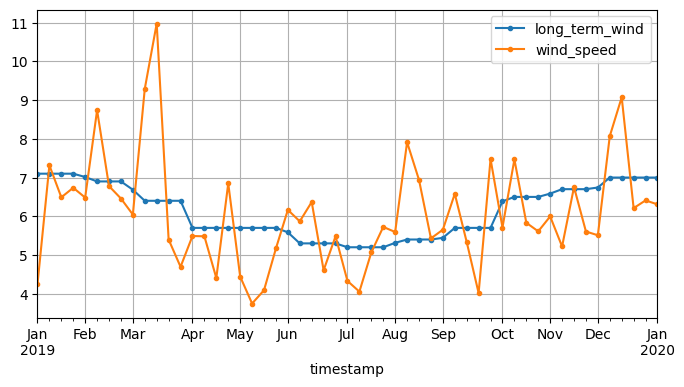

In [36]:
# Is wind_speed and long_term_wind the same? -> never the same!
print((final_kelmarsh_1_2019_df["wind_speed"] == final_kelmarsh_1_2019_df["long_term_wind"]).sum())
# What is long_term_wind?
## Seems to be a sort of average of wind_speed
fig, ax = plt.subplots(figsize=(8, 4))
period = slice("2016", "2021")
df_monthly = final_kelmarsh_1_2019_df[["long_term_wind", "wind_speed"]].resample('W').mean()
df_monthly.plot(ax=ax, grid=True, marker=".", legend=True)
plt.show()

In [90]:
final_kelmarsh_1_2019_df.describe()


,wind_speed,long_term_wind,energy_export,energy_budget_default,energy_theoretical,lost_production_to_performance,lost_production_total,virtual_production,power,potential_power_default_pc,potential_power_learned_pc,potential_power_reference_turbines,cascading_potential_power,cascading_potential_power_for_performance,potential_power_primary_reference_turbines,potential_power_mpc,available_capacity_for_production,voltage_l1_/_u,voltage_l2_/_v,voltage_l3_/_w,grid_voltage,current_l1_/_u,current_l2_/_v,current_l3_/_w,capacity_factor,data_availability,time_based_contractual_avail.,time_based_iec_b.2.2,time_based_iec_b.2.3,time_based_iec_b.2.4,time_based_iec_b.3.2,production_based_iec_b.2.2,production_based_iec_b.3.2,time_based_system_avail.,production_based_system_avail.,production_based_contractual_avail.,reactive_energy_import,grid_frequency,equivalent_full_load_hours,production_factor,apparent_power
count,48485.000000,52416.000000,49108.000000,52416.000000,49097.000000,48485.000000,49097.000000,49397.000000,48485.000000,48485.000000,47441.000000,48735.000000,49097.000000,48485.000000,48270.000000,48485.000000,50325.000000,48485.000000,48485.000000,48485.000000,48485.000000,48485.000000,48485.000000,48485.000000,49108.000000,52416.000000,50360.000000,50330.000000,50330.000000,49738.000000,49700.000000,48717.000000,48087.000000,50325.000000,48716.000000,48747.000000,49108.000000,48485.000000,49108.000000,48485.000000,48485.000000
mean,6.168942,6.126923,86.335770,115.740766,95.026471,0.163392,8.914503,85.830658,520.897390,596.350200,553.010610,569.194770,570.158824,574.844079,551.034348,596.350200,1873.327341,401.838669,402.550875,402.317549,488.580929,461.688770,468.006378,461.977504,0.252690,0.925004,0.966117,0.809399,0.913704,0.924723,0.938599,0.946766,0.969248,0.913818,0.949133,0.971048,24.676529,49.989942,151.614035,0.955943,555.014166
std,2.729510,0.673313,92.244914,29.257534,92.612788,15.505220,46.732671,92.210059,544.783016,604.735856,545.104864,527.214841,555.676726,564.852645,522.633931,604.735856,573.313123,3.758426,3.630603,3.596665,135.199415,460.793692,462.074379,458.882669,0.269985,0.263388,0.180562,0.391886,0.279347,0.262355,0.239691,0.222419,0.172552,0.279665,0.219082,0.167645,23.947998,0.266120,161.991069,0.306279,558.556516
min,0.114947,5.200000,0.000000,77.386873,0.000000,-81.089102,-81.089102,0.000000,-16.652830,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.942500,0.000000,1.885000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.234505,5.400000,14.000000,84.175179,19.952104,-3.951615,-3.860167,14.000000,87.578552,120.030075,114.888003,143.099590,119.712623,119.319273,134.096625,120.030075,2050.000000,400.021240,400.750000,400.558594,401.002747,98.318497,107.058746,100.893997,0.040976,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,49.958858,24.585366,0.906335,116.697540
50%,5.910000,5.700000,53.000000,100.467070,62.221499,0.000000,0.000000,52.000000,323.035889,374.259972,358.808772,400.606000,373.328992,371.500238,376.085065,374.259972,2050.000000,401.510742,402.298706,402.060150,402.902740,293.805237,303.118500,293.929993,0.155122,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,49.990002,93.073171,1.000000,352.516998
75%,7.775368,6.700000,131.000000,139.324234,149.509031,4.040189,5.559913,130.000000,800.038879,903.972983,858.069335,880.658551,897.054188,898.758505,844.590186,903.972983,2050.000000,403.078461,403.874908,403.595459,692.299988,700.805481,706.596252,699.859985,0.383415,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,50.024803,230.048780,1.052458,842.390015
max,22.910000,7.100000,438.000000,171.252874,343.053345,281.162146,343.053345,438.000000,2072.

In [ ]:
full_kelmarsh_df = pd.concat([kelmarsh_1_2016_df, kelmarsh_1_2017_df, kelmarsh_1_2018_df,
                             kelmarsh_1_2019_df, kelmarsh_1_2020_df, kelmarsh_1_2021_df])
full_kelmarsh_df.describe()


# Notes on data
What is vane?

How is lost production correlated with other variables?

What is Potential power default PC?

What is Cascading potential power?
- scenario where the failure or underperformance of one wind turbine has a cascading effect on the overall power generation capacity of a wind farm. For example, if one turbine experiences a major fault or breakdown, it could lead to decreased power generation and potentially impact the performance or operation of other turbines in the wind farm

What is Power factor?
- Power factor, often represented by the symbol "cosφ" or "PF," is a measure of the efficiency of electrical power utilization in an AC (alternating current) circuit. It describes the ratio of real power (active power) to apparent power in the circuit
Should gearbox speed be the same as rotor rpm/speed?
